<a href="https://colab.research.google.com/github/pranavsrinivas29/Statistics_and_Statisical_Methods/blob/main/Regularization_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$ \textbf{Ridge Regression (L2 Regularization):}$

In Ridge regression, a penalty term is added to the sum of squared coefficients in the linear regression objective function. The objective is to minimize the following cost function:

$ J(\beta) = \text{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2 $

- $ \text{RSS} $ is the residual sum of squares.
- $ \beta_j $ are the regression coefficients.
- $ \lambda $ is the regularization parameter, controlling the strength of the penalty term.

The penalty term $ \sum_{j=1}^{p} \beta_j^2 $ is the squared L2 norm of the coefficient vector.

$ \textbf{Lasso Regression (L1 Regularization):}$

In Lasso regression, a penalty term is added to the sum of the absolute values of the coefficients in the linear regression objective function. The objective is to minimize the following cost function:

$ J(\beta) = \text{RSS} + \lambda \sum_{j=1}^{p} |\beta_j| $

- $ \text{RSS} $ is the residual sum of squares.
- $ \beta_j $ are the regression coefficients.
- $ \lambda $ is the regularization parameter, controlling the strength of the penalty term.

The penalty term $ \sum_{j=1}^{p} |\beta_j| $ is the L1 norm of the coefficient vector.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8

Warning message in plot.window(...):
“"xvar" is not a graphical parameter”
Warning message in plot.window(...):
“"label" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xvar" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"label" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xvar" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"label" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xvar" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"label" is not a graphical parameter”
Warning message in box(...):
“

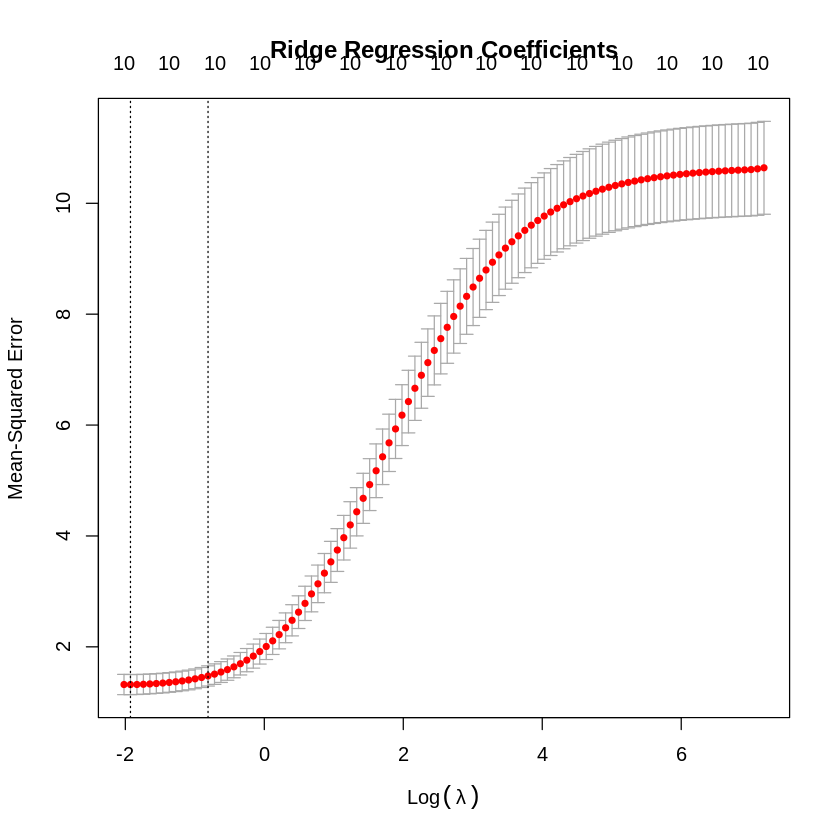

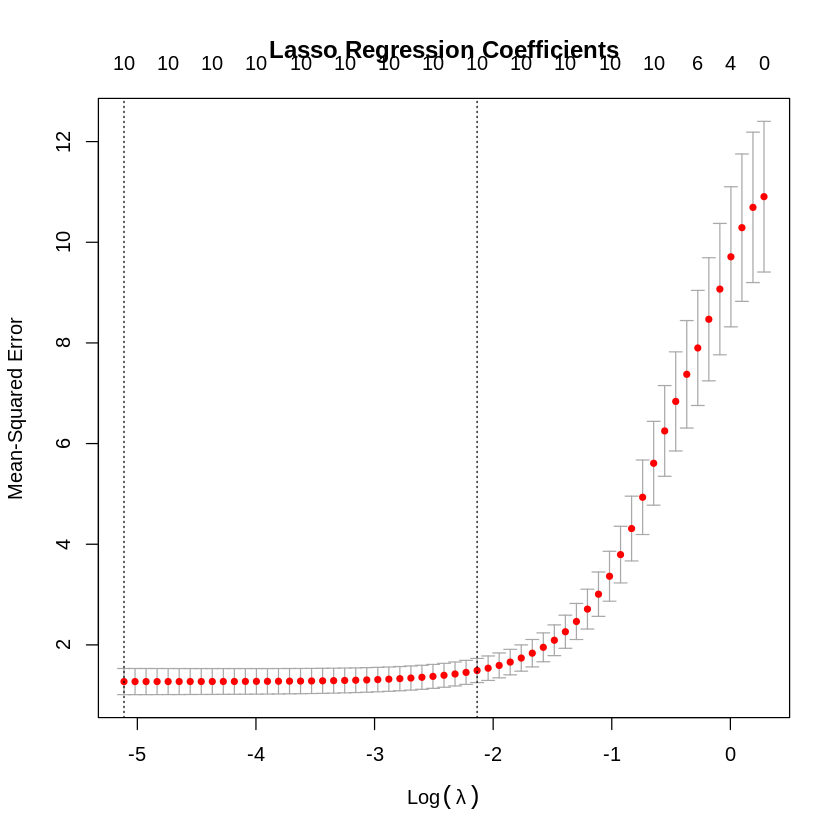

In [2]:
# Install and load the glmnet package if not already installed
install.packages("glmnet")

# Load glmnet package
library(glmnet)

# Generate some sample data
set.seed(123)
n <- 100
p <- 10

X <- matrix(rnorm(n * p), n, p)
beta_true <- rep(1, p)
y <- X %*% beta_true + rnorm(n)

# Create a glmnet object for Ridge regression
ridge_model <- cv.glmnet(X, y, alpha = 0)  # alpha = 0 for Ridge

# Create a glmnet object for Lasso regression
lasso_model <- cv.glmnet(X, y, alpha = 1)  # alpha = 1 for Lasso

# Plot the coefficients for Ridge regression
plot(ridge_model, xvar = "lambda", label = TRUE)
title("Ridge Regression Coefficients")

# Plot the coefficients for Lasso regression
plot(lasso_model, xvar = "lambda", label = TRUE)
title("Lasso Regression Coefficients")


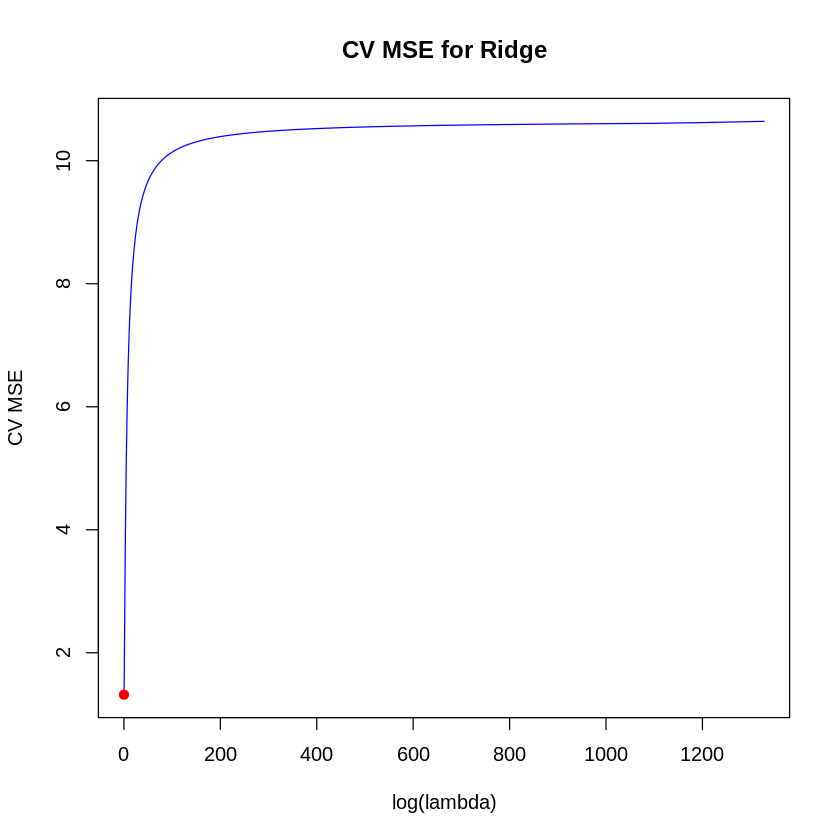

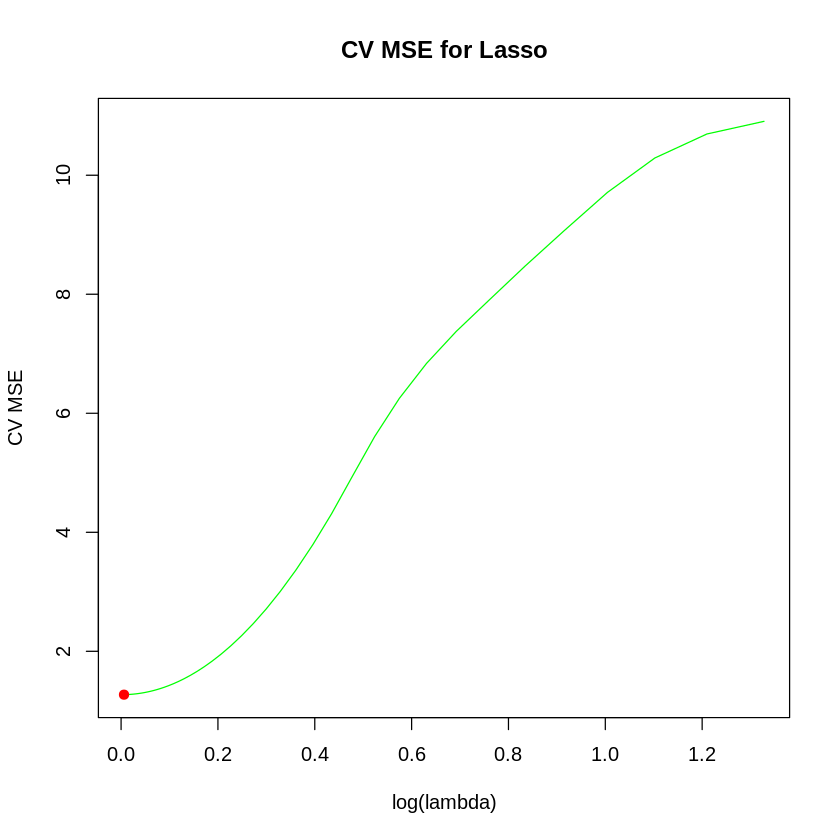

In [8]:
# Plot the cross-validated mean squared error for Ridge
plot(ridge_model$lambda, ridge_model$cvm, type = "l", col = "blue", xlab = "log(lambda)", ylab = "CV MSE", main = "CV MSE for Ridge")

# Add points for minimum CV MSE
points(ridge_model$lambda.min, ridge_model$cvm[ridge_model$lambda == ridge_model$lambda.min], col = "red", pch = 19)

# Plot the cross-validated mean squared error for Lasso
plot(lasso_model$lambda, lasso_model$cvm, type = "l", col = "green", xlab = "log(lambda)", ylab = "CV MSE", main = "CV MSE for Lasso")

# Add points for minimum CV MSE
points(lasso_model$lambda.min, lasso_model$cvm[lasso_model$lambda == lasso_model$lambda.min], col = "red", pch = 19)


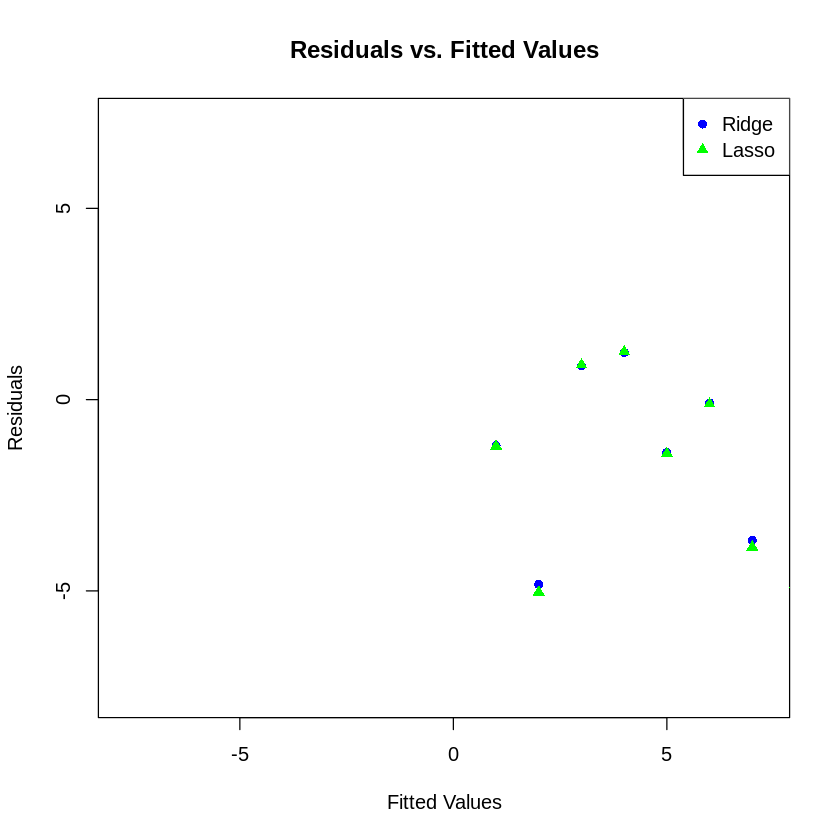

In [11]:
# Fit Ridge and Lasso models with the optimal lambda
ridge_optimal <- glmnet(X, y, alpha = 0, lambda = ridge_model$lambda.min)
lasso_optimal <- glmnet(X, y, alpha = 1, lambda = lasso_model$lambda.min)

# Compute residuals
ridge_residuals <- residuals(ridge_optimal)
lasso_residuals <- residuals(lasso_optimal)

# Plot residuals vs. fitted values for Ridge
plot(predict(ridge_optimal, newx = X), ridge_residuals,
     main = "Residuals vs. Fitted Values", xlab = "Fitted Values", ylab = "Residuals",
     col = "blue", pch = 16, cex = 1, xlim = c(min(predict(ridge_optimal, newx = X)), max(predict(ridge_optimal, newx = X))))

# Add a legend
legend("topright", legend = c("Ridge"), col = "blue", pch = 16)

# Plot residuals vs. fitted values for Lasso on the same plot
points(predict(lasso_optimal, newx = X), lasso_residuals, col = "green", pch = 17, cex = 1)

# Add a legend for Lasso
legend("topright", legend = c("Ridge", "Lasso"), col = c("blue", "green"), pch = c(16, 17))
